# Loading Real-World & Benchmarking Datasets with CausalForge

A dataset used for causal studies is, in general, different from datasets used for associational studies. 
In causal inference we have a fundamental problem which is, indeed, referred as fundamental problem of causal inference.

__Fundamental problem of causal inference (FPCI)__: _we do not observe both potential outcomes (control & treated), but 
    we only observe one._ 

Indeed, this formulation of FPCI holds only for binary exposures, when we have two cohorts: 
    treated & control (or untreated). In case of T exposures, we observe only one potential outcome and we do not 
    observe the remaining T-1. An unobserved potential outcome is generally referred as 
    __counterfactual__. 

In causal inference we have 

* __real-world datasets__: these datasets are real datasets; they are typically observational and obey to the FPCI, hence, they don't come with 
    counterfactuals; as a conseguence, it should not be possible to do causal model validation on this kind of daatsets, 
    although they are people who adopt associational metrics (e.g. accuracy or auROC)
    pretending they are proxies of causal metrics like PEHE (Precision in Estimation of Heterogeneous Effect) 
    or ATE (Average Treatment Effect) MAE (Mean Absolute Error), which, on the contrary, 
    requires counterfactuals for computation; 
    
* __benchmarking datasets__: these datasets can be either simulations or combinations of real-world datasets and 
    RCTs, and __they come with counterfactuals__; they can be used to do causal model validation.  

With CausalForge it is very easy to load a dataset. First, you want to load a proper __data loader__ given the name 
of the dataset, and then you want to load all the typical ingredients of a causal inference 
dataset, i.e., __covariates__, __teatment assigments__, __factuals__ and, if available, __counterfactuals__.

Let's see this in action with a dataset very popular in the causal inference community: __IHDP__. 

## The IHDP Dataset

The Infant Health and Development Program (IHDP) is a randomized controlled study designed to evaluate the effect of home visit from specialist doctors on the cognitive test scores of premature infants. The datasets is first used for benchmarking treatment effect estimation algorithms in Hill [1], where selection bias is induced by removing non-random subsets of the treated individuals to create an observational dataset, and the outcomes are generated using the original covariates and treatments. It contains 747 subjects and 25 variables. In order to compare our results with the literature and make our results reproducible, we use the simulated outcome implemented as setting “A” in [2], and downloaded the data at https://www.fredjo.com/, which is composed of 1000 repetitions of the experiment. 

In [1]:
from causalforge.data_loader import DataLoader 

r = DataLoader.get_loader('IHDP').load()
X_tr, T_tr, YF_tr, YCF_tr, mu_0_tr, mu_1_tr, X_te, T_te, YF_te, YCF_te, mu_0_te, mu_1_te = r 

X_tr.shape, T_tr.shape, YF_tr.shape, YCF_tr.shape, mu_0_tr.shape , mu_1_tr.shape

2023-05-04 21:55:10.169545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


((672, 25, 1000),
 (672, 1000),
 (672, 1000),
 (672, 1000),
 (672, 1000),
 (672, 1000))

In [2]:
X_te.shape, T_te.shape, YF_te.shape , YCF_te.shape, mu_0_te.shape , mu_1_te.shape 

((75, 25, 1000), (75, 1000), (75, 1000), (75, 1000), (75, 1000), (75, 1000))

Specifically, 

* __for the trainset__ X_tr, T_tr, YF_tr, YCF_tr, mu_0_tr, mu_1_tr  are covariates, treatment, factual outcome, counterfactual outcome, and noiseless potential outcomes respectively; 
* __for the testset__ X_te, T_te, YF_te, YCF_te, mu_0_te, mu_1_te  are covariates, treatment, factual outcome, counterfactual outcome, and noiseless potential outcomes respectively; 

Notice that the last dimension of each variable is 1000, as we have 1000 repetitions of the experiment.
Hence, this dataset should be used pretty much like in this code sketch:  

In [3]:
for idx in range(X_tr.shape[-1]):    
    t_tr, y_tr, x_tr, mu0tr, mu1tr = T_tr[:,idx] , YF_tr[:,idx], X_tr[:,:,idx], mu_0_tr[:,idx], mu_1_tr[:,idx] 
    t_te, y_te, x_te, mu0te, mu1te = T_te[:,idx] , YF_te[:,idx], X_te[:,:,idx], mu_0_te[:,idx], mu_1_te[:,idx]  

    # Train your causal method on train-set ...

    # Validate your method test-set ... 
    ATE_truth_tr = (mu1tr - mu0tr).mean()
    ATE_truth_te = (mu1te - mu0te).mean()
    
    ITE_truth_tr = (mu1tr - mu0tr)
    ITE_truth_te = (mu1te - mu0te)
    
    if idx<10:
        print("++++ Experiment ",idx,"/",X_tr.shape[-1])
        print("  ATE (train/test)::", ATE_truth_tr, ATE_truth_te)
        print("  ITE (train/test)::", ITE_truth_tr.shape, ITE_truth_te.shape)

++++ Experiment  0 / 1000
  ATE (train/test):: 4.0144505901891705 4.0305489972436686
  ITE (train/test):: (672,) (75,)
++++ Experiment  1 / 1000
  ATE (train/test):: 4.061018726235442 3.9596262629599708
  ITE (train/test):: (672,) (75,)
++++ Experiment  2 / 1000
  ATE (train/test):: 4.110469801399948 3.9978605132504823
  ITE (train/test):: (672,) (75,)
++++ Experiment  3 / 1000
  ATE (train/test):: 4.254634722808619 4.4443103197221285
  ITE (train/test):: (672,) (75,)
++++ Experiment  4 / 1000
  ATE (train/test):: 4.151266973614955 4.262547405163926
  ITE (train/test):: (672,) (75,)
++++ Experiment  5 / 1000
  ATE (train/test):: 4.011426976855247 3.937131526610354
  ITE (train/test):: (672,) (75,)
++++ Experiment  6 / 1000
  ATE (train/test):: 3.9941264781108985 3.958499708600623
  ITE (train/test):: (672,) (75,)
++++ Experiment  7 / 1000
  ATE (train/test):: 3.869525188323851 3.7114417347352258
  ITE (train/test):: (672,) (75,)
++++ Experiment  8 / 1000
  ATE (train/test):: 10.2027498

Whatever metric is adopted, at the end, results should be averaged over the 1000 repetitions. 

Notice that even if we use the ground truth on the train-set to estimate the ATE of the test-set 
we don't have a zero error: 

In [4]:
from causalforge.metrics import eps_ATE
import numpy as np

eps_ATE(np.vstack([mu1tr,mu0tr]).transpose() , np.vstack([mu1te,mu0te]).transpose())

0.5879717298086842

## Plot ITE Distribution 

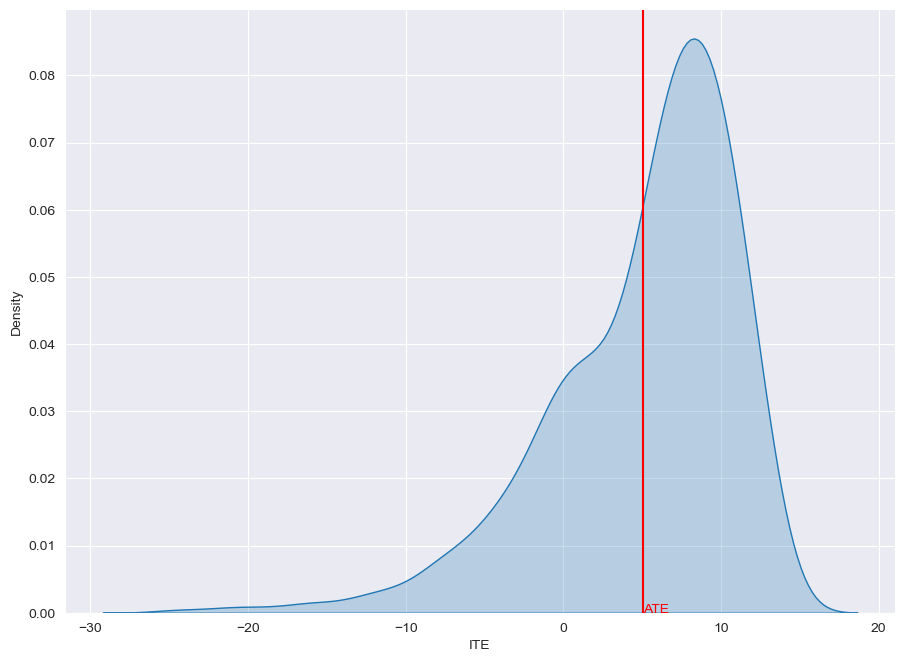

In [5]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(ITE_truth_tr)

## References 

1. [Hill J.L., Bayesian nonparametric modeling for causal inference, J. Comput. Graph. Statist., 20 (1) (2011), pp. 217-240, 10.1198/jcgs.2010.08162](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2010.08162)

2. Shi C., Blei D.M., Veitch V., Adapting neural networks for the estimation of treatment effects Wallach H.M., Larochelle H., Beygelzimer A., d’Alché Buc F., Fox E.B., Garnett R. (Eds.), NeurIPS (2019), pp. 2503-2513